## Hands-on Activity 4.1 | Linear Regression using Python

#### Objective(s):

This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

#### Intended Learning Outcomes (ILOs):

* Demonstrate how to solve regression problems using simple linear regression
* Use the linear regression model to predict the target value

####  Tasks:

1. Use the Life Expectancy dataset to predict the life expectancy. Choose the best independent variable from the dataset to predit the life expectancy. (Note: use correlation to choose the best independent variable). 
2. Compute the slope (m) and y-intercept(b)
3. Plot the centroid and regression line.
4. Create a function to predict the life expectancy using the independent variable

In [6]:
# from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# drive.mount('/content/drive')
# data_covid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Module 4 Assignments/Life Expectancy Data.csv')

data_covid = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\Introduction to Machine Learning\activities\Dataset\Life Expectancy Data.csv')

data_covid

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
# check the spellin of the colums

data_covid.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
# look for NA or missing values in the data frame and fill them with the mean

for i in data_covid.columns:
  if i == 'Country' or i == 'Status':
    continue
  else:
    data_covid[i] = data_covid[i].fillna(data_covid[i].mean())


In [12]:
data_covid_corr = data_covid.corr(method = 'pearson')
data_covid_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


In [31]:
# according to the correlation, the variable that has the highest correlation
# with Life expectancy is schooling

#rename 'Life expectancy to 'LE'

data_covid.rename(columns = {'Life expectancy ':'LE'}, inplace = True)

#create the y(dependent) and x(independent) variables
x = data_covid.Schooling
y = data_covid.LE

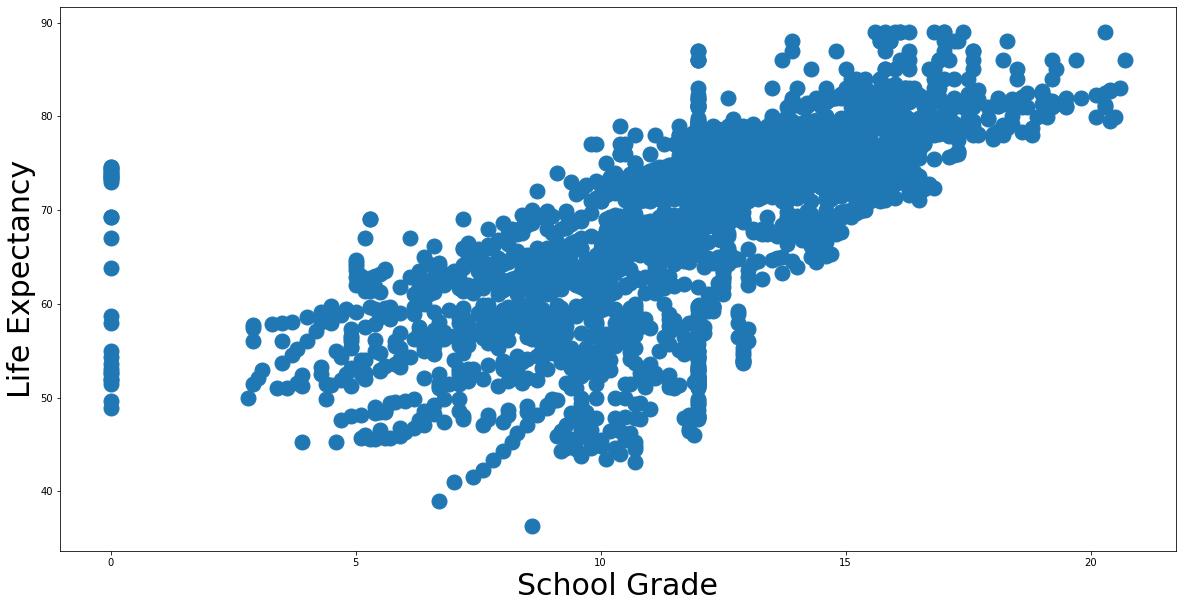

In [32]:
# Size of the plot
plt.figure(figsize=(20,10))

#scatter plot creation
plt.plot(x,y,'o', markersize = 15)

#Add labels to the axes
plt.ylabel('Life Expectancy', fontsize = 30)
plt.xlabel('School Grade', fontsize = 30)

#display the graph
plt.show()

In [33]:
# create the slope to fit the regression

m, b = np.polyfit(x,y,1)

print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 2.08.
The y-intercept is 44.25.
The best fit simple linear regression line is 2.08x + 44.25.


In [34]:
yMean = y.mean()
xMean = x.mean()

print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(xMean, yMean))

The centroid for this dataset is x = 11.99 and y = 69.22.


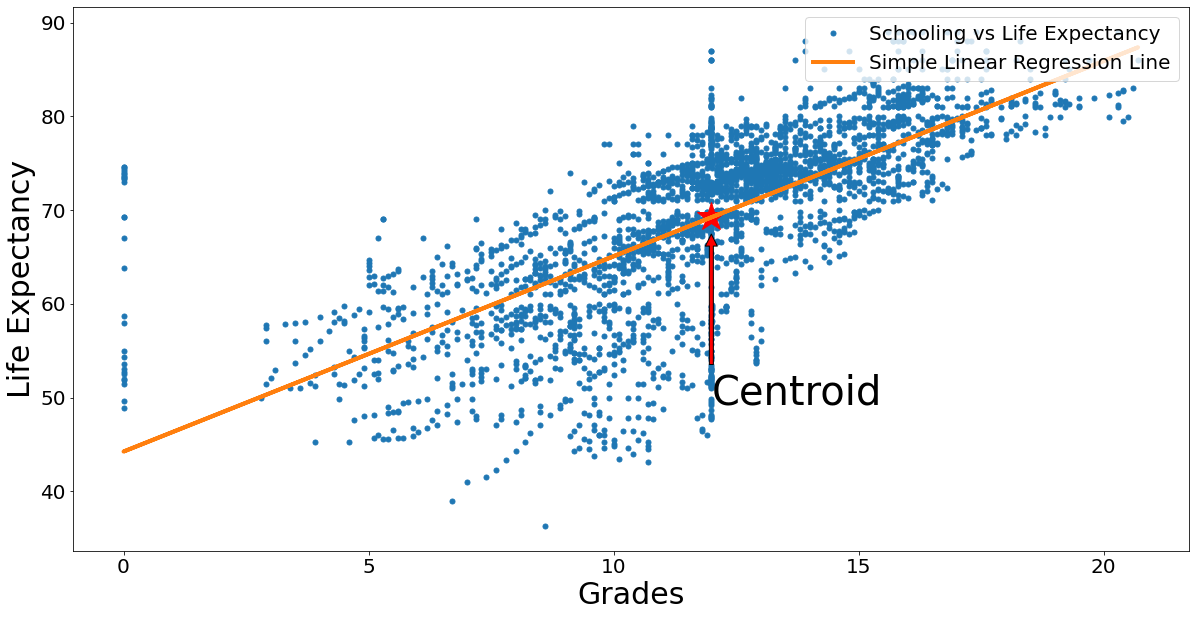

In [39]:
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 5, label = "Schooling vs Life Expectancy") 

# Plot the centroid point
plt.plot(xMean,yMean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Life Expectancy', fontsize = 30)
plt.xlabel('Grades', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(xMean, yMean-1), xytext=(xMean, yMean-20), arrowprops=dict(facecolor='red', shrink=0.05), fontsize = 40)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

In [36]:
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 0:
        predict = m * query + b
        return predict
    else:
        print ("The grade you inputted must be a positive number")

In [37]:
predict(10)

65.07462365395945

#### Resources:
* Jupyter Notebook

Conclusion:

This lab gave me an idea of how we might be able to use machine learning to predict a value from a independent variable value that may not exist in our data. Overall, my experience with Linear Regression was really nice and fulfilling since I understand every line of code that I used. I think the linear regression line was properly created as you can visually see that it lies within the data points. In the future I would like to include a value that estimates how well-fitted the line is to the given data points. I can't deduce what this number is just by looking at the figure since the data points are very numerouus and clustered.